In [1]:
#importing the necessary libraries
from pyspark.ml.regression import LinearRegression as lr
from pyspark.sql import SparkSession

In [2]:
#starting a spark session
spark = SparkSession.builder.appName('Lin_Reg').getOrCreate()

In [3]:
#loading the data set
all_data = spark.read.format('libsvm').load('sample_linear_regression_data.txt')

In [4]:
#exploring the data
all_data.summary().show()

+-------+-------------------+
|summary|              label|
+-------+-------------------+
|  count|                501|
|   mean|0.25688882219498976|
| stddev| 10.317884030544564|
|    min|-28.571478869743427|
|    25%| -6.749023248121471|
|    50%| 0.3422568955736137|
|    75%|  7.314490512652487|
|    max|  27.78383192005107|
+-------+-------------------+



In [5]:
#checking the data set columns and checking if the data is split into testing-training sub-sets
all_data.columns

['label', 'features']

In [6]:
#splitting the data into test and train data sets
train_data, test_data = all_data.randomSplit([0.75, 0.25])

In [7]:
#confirming the split
train_data, test_data

(DataFrame[label: double, features: vector],
 DataFrame[label: double, features: vector])

In [8]:
#starting a linear regression model session
lin_reg_session = lr(featuresCol='features', labelCol='label', predictionCol='predictions')

In [9]:
#training the model
lin_reg_model = lin_reg_session.fit(train_data)

In [10]:
#creating the summary variable
summary = lin_reg_model.summary

In [11]:
#checking the feature coefficients
lin_reg_model.coefficients

DenseVector([-0.7984, 0.8384, -0.1915, 3.0436, -0.0303, 0.6675, -0.2749, -1.1683, 0.0639, 0.849])

In [12]:
#chekcing the intercept
lin_reg_model.intercept

-0.22159621623868014

In [13]:
#saving the evaluation of the train data in a variable
result_train = lin_reg_model.evaluate(train_data)
result_train.predictions.show()

+-------------------+--------------------+--------------------+
|              label|            features|         predictions|
+-------------------+--------------------+--------------------+
|-28.571478869743427|(10,[0,1,2,3,4,5,...|  -1.492711347595661|
|-28.046018037776633|(10,[0,1,2,3,4,5,...|   -2.10009348094064|
|-26.805483428483072|(10,[0,1,2,3,4,5,...|  1.4210770318904395|
| -23.51088409032297|(10,[0,1,2,3,4,5,...| -3.0683501618189464|
|-20.212077258958672|(10,[0,1,2,3,4,5,...|  1.1897289618326645|
|-20.057482615789212|(10,[0,1,2,3,4,5,...| 0.05641856705287479|
|-19.884560774273424|(10,[0,1,2,3,4,5,...|  0.6806346117178579|
| -19.66731861537172|(10,[0,1,2,3,4,5,...|  0.2312258198834775|
|-19.402336030214553|(10,[0,1,2,3,4,5,...|  0.2816466330052077|
| -18.27521356600463|(10,[0,1,2,3,4,5,...|   1.065246099351525|
|-17.803626188664516|(10,[0,1,2,3,4,5,...| -2.0093077913530184|
|-17.428674570939506|(10,[0,1,2,3,4,5,...|  1.2715682071677414|
| -17.32672073267595|(10,[0,1,2,3,4,5,..

In [14]:
#saving the evaluation of the test data in a variable
result_test = lin_reg_model.evaluate(test_data)
result_test.predictions.show()

+-------------------+--------------------+-------------------+
|              label|            features|        predictions|
+-------------------+--------------------+-------------------+
|-26.736207182601724|(10,[0,1,2,3,4,5,...| -3.416901911718064|
|-23.487440120936512|(10,[0,1,2,3,4,5,...|0.24731374204882578|
|-22.949825936196074|(10,[0,1,2,3,4,5,...| 2.1992843041425045|
|-22.837460416919342|(10,[0,1,2,3,4,5,...|-2.0782143847168117|
|-21.432387764165806|(10,[0,1,2,3,4,5,...|-0.3496687205077042|
|-19.872991038068406|(10,[0,1,2,3,4,5,...| 0.9159140613241967|
|-19.782762789614537|(10,[0,1,2,3,4,5,...| 1.2334026854731932|
| -19.16829262296376|(10,[0,1,2,3,4,5,...|-0.9608662867514692|
|-18.845922472898582|(10,[0,1,2,3,4,5,...|  1.248414244564385|
|-17.494200356883344|(10,[0,1,2,3,4,5,...|-1.7827015876902386|
| -16.26143027545273|(10,[0,1,2,3,4,5,...|  4.373565118156099|
|-16.151349351277112|(10,[0,1,2,3,4,5,...|-0.8399115719144117|
|-15.359544879832677|(10,[0,1,2,3,4,5,...|  1.476010164

In [15]:
#comparing the errors of the train and test evaluations
result_train.meanAbsoluteError, result_test.meanAbsoluteError

(8.133791835282729, 8.326328265520266)

In [16]:
#exploring the residuals of the train data
result_train.residuals.orderBy(result_train.residuals['residuals'].desc()).show()

+------------------+
|         residuals|
+------------------+
|27.029480438354817|
|24.681843828733623|
|24.567674464502748|
|22.462212324706357|
|  22.3906855195482|
|21.891552021830353|
| 21.80338727116256|
| 21.21441215301939|
|  20.2011139073038|
|19.066964781686593|
| 18.93616834678063|
| 18.20400667499421|
|18.081176499011413|
| 17.90423089974488|
|17.546965115449797|
|17.339603988477517|
|16.772070913603887|
| 16.41503666887528|
|16.312147569564793|
| 16.17528293800138|
+------------------+
only showing top 20 rows



In [17]:
#exloring the stats of the residual of the train data 
result_train.residuals.describe().show()

+-------+--------------------+
|summary|           residuals|
+-------+--------------------+
|  count|                 345|
|   mean|-1.69912393333937...|
| stddev|  10.127991909067346|
|    min| -28.226560460373513|
|    max|  27.029480438354817|
+-------+--------------------+



In [18]:
#exploring the residuals of the test
result_test.residuals.orderBy(result_test.residuals['residuals'].desc()).show()

+------------------+
|         residuals|
+------------------+
|27.729275677732726|
|21.603061573117195|
|21.357186309690864|
|20.918384821702325|
| 20.13265910420967|
|19.497184787613833|
|18.712936591916932|
|18.282200339221028|
|16.335685229530966|
|15.940451520729102|
|14.783563539487117|
|14.512689748245645|
|14.121925610718664|
|14.088565442050712|
|  13.7627295967235|
|13.534119275282702|
|13.450405382220003|
|13.351680454301516|
|12.858933476358434|
|12.073852707540771|
+------------------+
only showing top 20 rows



In [19]:
#exploring the stats of the residuals of the test data
result_test.residuals.describe().show()

+-------+------------------+
|summary|         residuals|
+-------+------------------+
|  count|               156|
|   mean|1.0466364438906646|
| stddev|10.401910890156755|
|    min|-25.14911024033858|
|    max|27.729275677732726|
+-------+------------------+



### Residuals seem quite large. We will continue to explore and evaluate the model more closely

In [20]:
#import graphing libraries
import matplotlib.pyplot as mpl

In [21]:
#manually calculate the training residuals and compare it to the built-in residuals function
#visually inspect the distribution of the residuals
    #compare predictions to labels with a scatter plot
    #inspect the frequency distribution of the resisuals
    
#next fex lines will be executing the plan above

In [22]:
#extract the prediction from the results of the training dataframe into a variable
predictions_train = result_train.predictions.collect()

#save the predictions to a list
predictions_col_prediction = []
for row in predictions_train:
    predictions_col_prediction.append(row[2])
    
#save the labels into a list
predictions_col_labels = []
for row in predictions_train:
    predictions_col_labels.append(row[0])

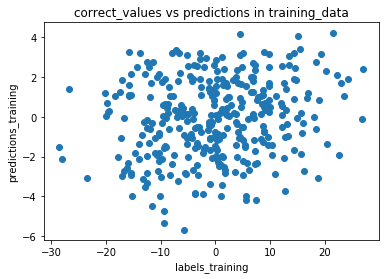

In [23]:
#visually compare the predictions to the labels 
mpl.scatter(x=predictions_col_labels, y=predictions_col_prediction )
mpl.xlabel('labels_training')
mpl.ylabel('predictions_training')
mpl.title('correct_values vs predictions in training_data')
mpl.show()

### the linear regression model doesn't seem to be working well for the given data_set. Before switching to other models, I 'll double check if the ML library is working correctly by manually calculating the residuals

In [24]:
#visually compare the resididuals calculated by the spark and manually

#pair up the labels and predictions to be able to feed them as row objects to a spark dataframe
residual_pairs = list(zip( predictions_col_labels, predictions_col_prediction))

#create a list of the calculated residuals
residuals_calculated = []
for item in residual_pairs:
    residuals_calculated.append(item[0]-item[1])
    
#save the builtin residuals in to a variable
residuals_builtin =[]
for row in result_train.residuals.collect():
    residuals_builtin.append(row[0])

(array([ 3.,  0.,  4.,  8., 11., 18., 27., 27., 28., 35., 43., 32., 28.,
        30., 19., 11., 10.,  4.,  4.,  3.]),
 array([-28.22656046, -25.46375842, -22.70095637, -19.93815433,
        -17.17535228, -14.41255024, -11.64974819,  -8.88694615,
         -6.1241441 ,  -3.36134206,  -0.59854001,   2.16426203,
          4.92706408,   7.68986612,  10.45266817,  13.21547021,
         15.97827226,  18.7410743 ,  21.50387635,  24.26667839,
         27.02948044]),
 <a list of 20 Patch objects>)

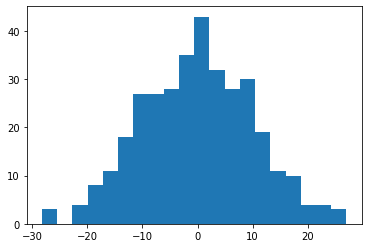

In [25]:
#check the probability distribution of the residuals
mpl.hist(residuals_builtin, bins=20)

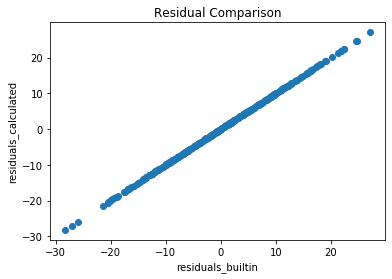

In [26]:
#visually compare builtin and calculated residuals
mpl.scatter(residuals_builtin, residuals_calculated)
mpl.xlabel('residuals_builtin')
mpl.ylabel('residuals_calculated')
mpl.title('Residual Comparison')
mpl.show()

### As it can be seen from the graph, our model is working fine but linear regression isn't a good choice for this dataset. 

## Now we will evaluate the test data. The model is expected to perform even worse with the test data since it hasn't seen the test data, yet. But let's check to see what happens.

In [27]:
#This is the same steps as the ones we used for the training data except we will use the 'result_test' instead of 'result_train'

#extract the prediction from the results of the testting dataframe into a variable
predictions_test = result_test.predictions.collect()

#save the predictions to a list
predictions_col_prediction = []
for row in predictions_train:
    predictions_col_prediction.append(row[2])
    
#save the labels into a list
predictions_col_labels = []
for row in predictions_train:
    predictions_col_labels.append(row[0])
    
#visually compare the resididuals calculated by the spark and manually

#pair up the labels and predictions to be able to feed them as row objects to a spark dataframe
residual_pairs_test = list(zip( predictions_col_labels, predictions_col_prediction))

#create a list of the calculated residuals
residuals_calculated = []
for item in residual_pairs:
    residuals_calculated.append(item[0]-item[1])
    
#save the builtin residuals in to a variable
residuals_builtin =[]
for row in result_train.residuals.collect():
    residuals_builtin.append(row[0])

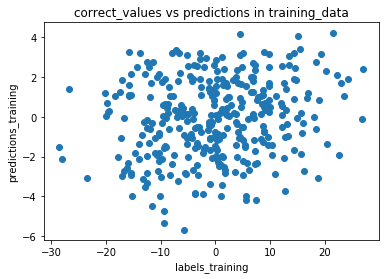

In [28]:
#visually compare the predictions to the labels 
mpl.scatter(x=predictions_col_labels, y=predictions_col_prediction )
mpl.xlabel('labels_training')
mpl.ylabel('predictions_training')
mpl.title('correct_values vs predictions in training_data')
mpl.show()

(array([ 3.,  0.,  4.,  8., 11., 18., 27., 27., 28., 35., 43., 32., 28.,
        30., 19., 11., 10.,  4.,  4.,  3.]),
 array([-28.22656046, -25.46375842, -22.70095637, -19.93815433,
        -17.17535228, -14.41255024, -11.64974819,  -8.88694615,
         -6.1241441 ,  -3.36134206,  -0.59854001,   2.16426203,
          4.92706408,   7.68986612,  10.45266817,  13.21547021,
         15.97827226,  18.7410743 ,  21.50387635,  24.26667839,
         27.02948044]),
 <a list of 20 Patch objects>)

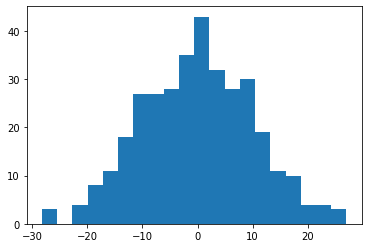

In [29]:
#check the probability distribution of the residuals
mpl.hist(residuals_builtin, bins=20)